In [1]:
import numpy as np             # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import math

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"

foggie_sim = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
github_dir = "/Users/hylee/coding/foggie/foggie/" 
snap = "RD0031"
foggie_output = '/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/'
track_dir = github_dir + 'halo_infos/008508/nref11c_nref9f/'
track_name = github_dir + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
snap_name = foggie_sim + snap + '/' + snap

In [2]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)

Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0031/RD0031


yt : [INFO     ] 2023-06-28 14:04:53,028 Parameters: current_time              = 370.66781181459
yt : [INFO     ] 2023-06-28 14:04:53,029 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-06-28 14:04:53,030 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-28 14:04:53,031 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-28 14:04:53,031 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-28 14:04:53,032 Parameters: current_redshift          = 0.59999996599899
yt : [INFO     ] 2023-06-28 14:04:53,033 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-06-28 14:04:53,034 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-06-28 14:04:53,035 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-28 14:04:53,036 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:       col1         col2     col3     col4     col5     col6     col7   col8
---------------- -------- -------- -------- -------- -------- -------- ----
0.60034007987421 0.490652 0.478112 0.505145 0.492652 0.480112 0.507145    9


Parsing Hierarchy : 100%|████████████████| 6284/6284 [00:00<00:00, 11356.86it/s]
yt : [INFO     ] 2023-06-28 14:04:53,986 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


In [3]:
matplotlib.use("Agg")

size = 30 #FRB was restricting everything inside a box with a length of 10 kpc. 
xres = 70
yres = 70
axis_x= "x"
axis_y = "y"
axis_z = "z"

projx = ds.proj(("gas", "density"), axis_x , center = ds.halo_center_kpc, 
                data_source = refine_box, weight_field = "density")
projy = ds.proj(("gas", "density"), axis_y , center = ds.halo_center_kpc, 
              data_source = refine_box, weight_field = "density")
projz = ds.proj(("gas", "density"), axis_z , center = ds.halo_center_kpc, 
              data_source = refine_box, weight_field = "density")

width = (size, "kpc")  

res = [xres,yres] 

frbx = projx.to_frb(width, res, center = ds.halo_center_kpc)
frby = projy.to_frb(width, res, center = ds.halo_center_kpc)
frbz = projz.to_frb(width, res, center = ds.halo_center_kpc)

yt : [INFO     ] 2023-06-28 14:05:08,226 Projection completed


In [4]:
%matplotlib inline

fontsize = 15


def projection(frb):
    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax.imshow(np.log10(np.array(frb["gas","density"])), 
                   cmap='viridis', extent = [-size/2, size/2, -size/2, size/2])
    
    fig.colorbar(im, cax=cax, orientation='vertical')

    cbar = fig.colorbar(im, cax=cax, orientation='vertical')

    cbar.ax.tick_params(labelsize = 15) 

    cbar.set_label('Density [log g/cm^3]') #=> change this to density & increase the fontsize 

    #ax.set_title("Metallicity plot of Tempest RD0042")

    if frb == frbx:
        ax.set_xlabel('Distance in y axis from center [kpc]', fontsize=fontsize)
        ax.set_ylabel('Distance in z axis from center [kpc]', fontsize=fontsize)
    elif frb == frby:
        ax.set_xlabel('Distance in z axis from center [kpc]', fontsize=fontsize)
        ax.set_ylabel('Distance in x axis from center [kpc]', fontsize=fontsize)
    elif frb == frbz:
        ax.set_xlabel('Distance in x axis from center [kpc]', fontsize=fontsize)
        ax.set_ylabel('Distance in y axis from center [kpc]', fontsize=fontsize)
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    return cbar, im

yt : [INFO     ] 2023-06-28 14:05:14,194 Making a fixed resolution buffer of (('gas', 'density')) 70 by 70


(<matplotlib.colorbar.Colorbar at 0x7faba1bfa500>,
 <matplotlib.image.AxesImage at 0x7faba1c66fb0>)

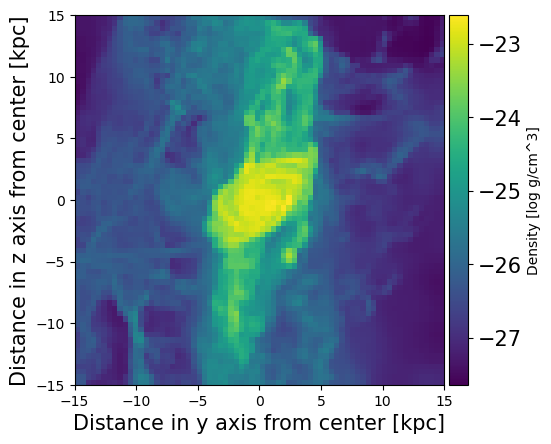

In [5]:
projection(frbx)

(<matplotlib.colorbar.Colorbar at 0x7fab82a9f430>,
 <matplotlib.image.AxesImage at 0x7faba1c0ab30>)

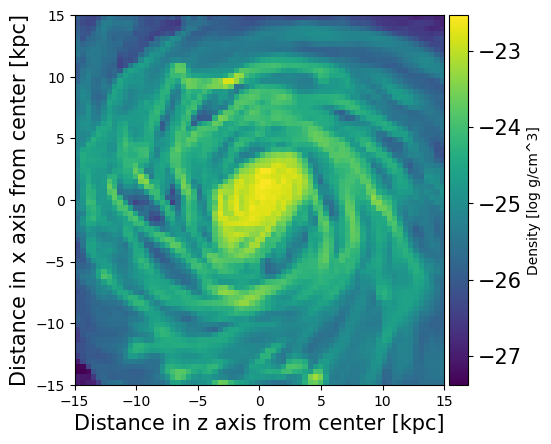

In [6]:
projection(frby)

(<matplotlib.colorbar.Colorbar at 0x7fab828a8ca0>,
 <matplotlib.image.AxesImage at 0x7faba1e091e0>)

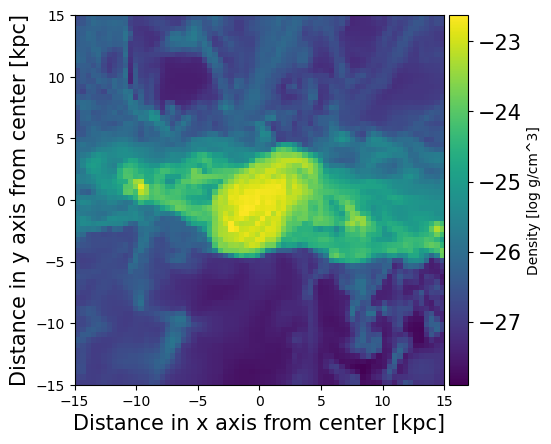

In [7]:
projection(frbz)

yt : [INFO     ] 2023-06-28 14:05:14,865 xlim = 0.490652 0.492652
yt : [INFO     ] 2023-06-28 14:05:14,867 ylim = 0.478112 0.480112
yt : [INFO     ] 2023-06-28 14:05:14,869 xlim = 0.490633 0.492633
yt : [INFO     ] 2023-06-28 14:05:14,870 ylim = 0.478058 0.480058
yt : [INFO     ] 2023-06-28 14:05:14,871 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



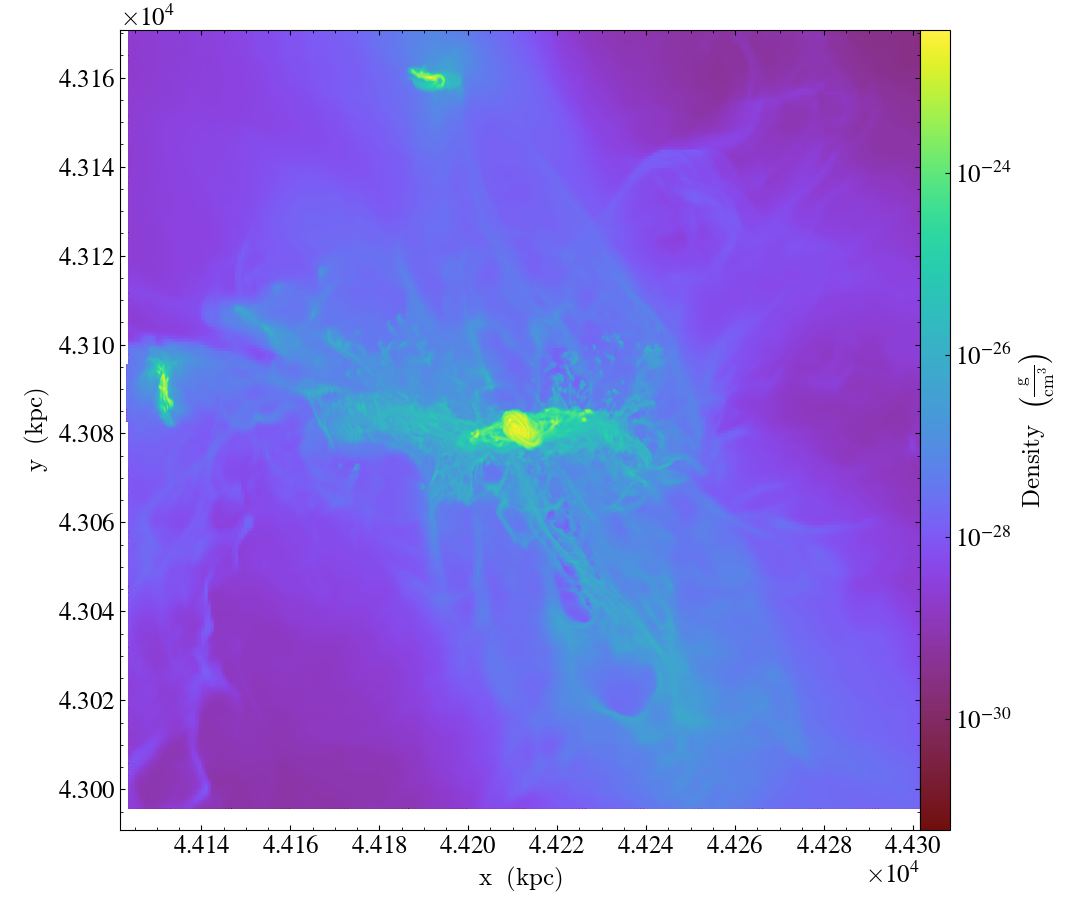

In [8]:
projz.plot()
plt.show()